<a href="https://colab.research.google.com/github/kennydukor/Coding-Practice/blob/master/Data_Structure_and_Algorithims.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dynamic Programming

In [ ]:
import time

##Memoization Recipe 

Step 1: Make it work
- Visualize the problem as a tree
- Implement the tree using recursion (Brute Force Solution)
- Test it (ie, it should give valid solution)

Step 2: Make it efficient
- Add a memo object (it should be share across the recursive calls)
- Add a base case to return memo values
- Store return value in memo

**Time Complexity Notations**
- m = target sum
- n = array length

##Fibonacci

####Fibonacci: Naive Recursive Approach (Approach 1)

**Time Complexity**
- $O(2^{n})$ time
- $O(n)$ space

In [ ]:
def fib_1(n):
  if n<=2:
    result = 1
  else:
    result = fib_1(n-1) + fib_1(n-2)
  return result

In [ ]:
start_time = time.time()
print(fib_1(40))
print("--- %s seconds ---" % (time.time() - start_time))

102334155
--- 22.91421127319336 seconds ---


####Fibonacci: Memoized Solution (Approach 2)

**Time Complexity**
- $O(n)$ time
- $O(n)$ space

In [ ]:
def fib_2(n, memo={}):
  if n in memo.keys():
    return memo[n]
  if n<=2:
    result = 1
  else:
    result = fib_2(n-1, memo) + fib_2(n-2, memo)
    memo[n] = result
  return result

In [ ]:
start_time = time.time()
n = 1000
print(fib_2(n))
print("--- %s seconds ---" % (time.time() - start_time))

43466557686937456435688527675040625802564660517371780402481729089536555417949051890403879840079255169295922593080322634775209689623239873322471161642996440906533187938298969649928516003704476137795166849228875
--- 0.0038640499114990234 seconds ---


####Fibonacci: Bottom-Up Approach

In [ ]:
def fib_bottom_up(n):
  if n<=2:
    return 1
  dyn_array = [None]* (n+1)
  dyn_array[1] = 1
  dyn_array[2] = 1

  for i in range(3, n+1):
    dyn_array[i] = dyn_array[i-1] + dyn_array[i-2]
  return dyn_array[n]

In [ ]:
start_time = time.time()
n = 1000
print(fib_bottom_up(n))
print("--- %s seconds ---" % (time.time() - start_time))

43466557686937456435688527675040625802564660517371780402481729089536555417949051890403879840079255169295922593080322634775209689623239873322471161642996440906533187938298969649928516003704476137795166849228875
--- 0.002488851547241211 seconds ---


##Grid Traveler

Say that you are a traveler on a 2D grid. You begin in the top-left corner and your goal is to travel to the bottom-right corner. You may only move down or right.

In how many way can you travel to the goal on a grid with dimensions `m * n`

Write a function `gridTravler(m, n)` to implement this


adapted from: [Coderbyte](https://coderbyte.com/)

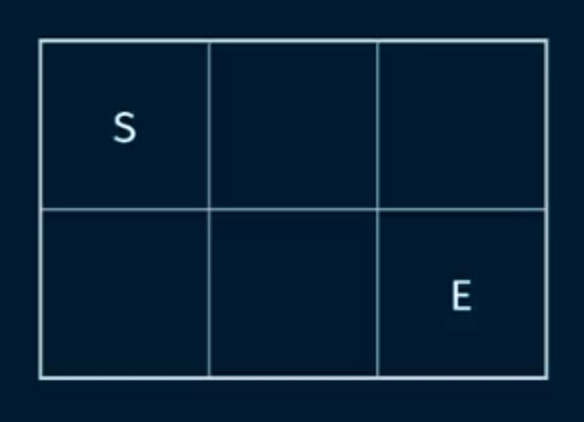

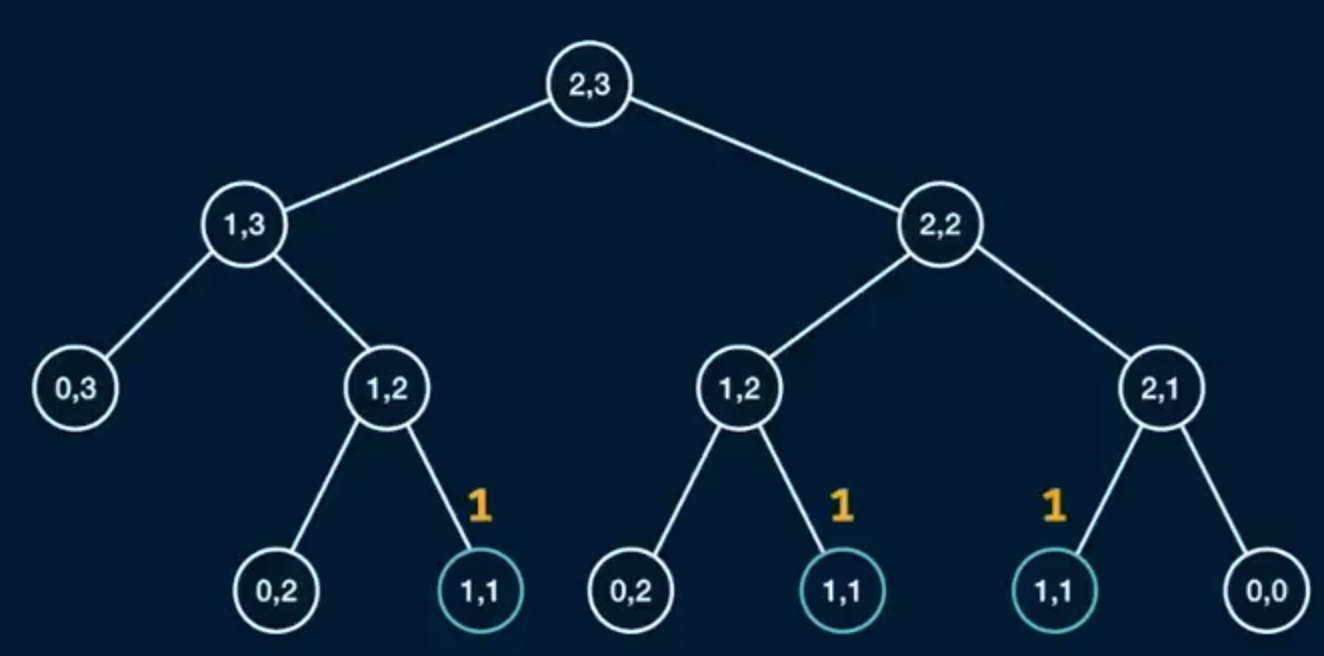

####Grid Traveler: Brute Force Recursion

**Time Complexity**
- $O(2^{m * n})$ time
- $O(n + m)$ space

Notice that the dimension changes for each down or right movement the agent makes.

e.g, For a `2 * 3` grid, if the agents starts at position (1, 1) and moves right, the grid size with valid movement shrinks to `2 * 2`

In [ ]:
def gridTraveler(m, n):
  if m == 0 or n == 0:
    return 0
  if m == 1 and n == 1:
    return 1
  return gridTraveler(m-1, n) + gridTraveler(m, n-1)

In [ ]:
start_time = time.time()
print(gridTraveler(10,10))
print("--- %s seconds ---" % (time.time() - start_time))

48620
--- 0.04774284362792969 seconds ---


####Grid Traveler: Memoization

**Time Complexity**
- $O(m * n)$ time
- $O(n + m)$ space

In [ ]:
def gridTraveler_memo(m, n, memo = {}):
  if m == 0 or n == 0:
    return 0
  if m == 1 and n == 1:
    return 1
  if (m, n) in memo:
    return memo[m, n]
  result = gridTraveler_memo(m-1, n, memo) + gridTraveler_memo(m, n-1, memo)
  memo[m, n] = result
  return result

In [ ]:
start_time = time.time()
print(gridTraveler_memo(18,18))
print("--- %s seconds ---" % (time.time() - start_time))

2333606220
--- 0.0014083385467529297 seconds ---


##canSum

Write a function `canSum(targetSum, numbers)` that takes in a targetSum and an array of numbers as arguments.

The function should return a boolean indicating whether or not it is possible to generate the targetSum using numbers from the array.

You may use an element of the array as many times as needed.

You may assume that all input numbers are nonnegative

####canSum: Brute Force

**Time Complexity**
- $O(n * m)$ time
- $O(m)$ space

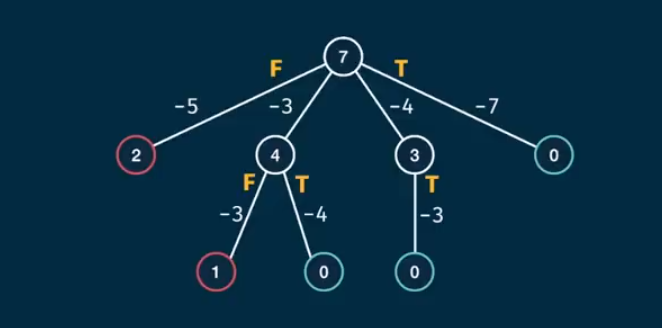

For image above: targetSum = 7 and numbers = [5, 3, 4, 7]

**Return Possible Number of SUM**

In [ ]:
# This will give the number of possible SUM
def canSum(targetSum, numbers):
  leastNum = min(numbers)
  if targetSum == 0:
    return True
  if targetSum < leastNum:
    return False
  newTargetSum = 0
  for i in range(len(numbers)):
    newTargetSum += canSum(targetSum - numbers[i], numbers)
  return newTargetSum

In [ ]:
start_time = time.time()
print(canSum(7,[5, 3, 4, 7]))
print("--- %s seconds ---" % (time.time() - start_time))

3
--- 0.0005502700805664062 seconds ---


**Return Boolean of True if SUM is possible: APPROACH 1**

In [ ]:
# APPRAOCH 1: This will tell if a SUM exists
def canSum_bool_1(targetSum, numbers):
  leastNum = min(numbers)
  if targetSum == 0:
    return True
  if targetSum < leastNum:
    return False
  newTargetSum = 0
  for i in range(len(numbers)):
    newTargetSum += canSum_bool_1(targetSum - numbers[i], numbers)
  return bool(newTargetSum)

In [ ]:
start_time = time.time()
print(canSum_bool_1(7,[5, 3, 4, 7]))
print("--- %s seconds ---" % (time.time() - start_time))

True
--- 0.0006253719329833984 seconds ---


**Return Boolean of True if SUM is possible: APPROACH 2**

In [ ]:
# APPRAOCH 2: This will tell if a SUM exists
def canSum_bool_2(targetSum, numbers):
  leastNum = min(numbers)
  if targetSum == 0:
    return True
  if targetSum < leastNum:
    return False
  for i in range(len(numbers)):
    if canSum_bool_2(targetSum - numbers[i], numbers) == True:
      return True
  return False

In [ ]:
start_time = time.time()
print(canSum_bool_2(7,[5, 3, 4, 7]))
print("--- %s seconds ---" % (time.time() - start_time))

True
--- 0.0014030933380126953 seconds ---


####canSum: Memoized

**Time Complexity**
- $O(m * n)$ time
- $O(m)$ space

**Return Boolean of True if SUM is possible: APPROACH 1**

In [ ]:
# APPROACH 1: This will tell if a SUM exists
def canSum_bool_memo_1(targetSum, numbers, memo = {}):
  leastNum = min(numbers)
  if targetSum == 0:
    return True
  if targetSum < leastNum:
    return False
  if targetSum in memo.keys():
    return memo[targetSum]
  newTargetSum = 0
  for i in range(len(numbers)):
    newTargetSum += canSum_bool_memo_1(targetSum - numbers[i], numbers, memo)
    memo[targetSum] = newTargetSum
  return bool(newTargetSum)

In [ ]:
start_time = time.time()
print(canSum_bool_memo_1(300,[7, 14]))
print("--- %s seconds ---" % (time.time() - start_time))

False
--- 0.0012826919555664062 seconds ---


**Return Boolean of True if SUM is possible: APPROACH 2**

In [ ]:
# APPROACH 2: This will tell if a SUM exists
def canSum_bool_memo_2(targetSum, numbers, memo = {}):
  leastNum = min(numbers)
  if targetSum == 0:
    return True
  if targetSum < leastNum:
    return False
  if targetSum in memo.keys():
    return memo[targetSum]
  newTargetSum = 0
  for i in range(len(numbers)):
      if canSum_bool_memo_1(targetSum - numbers[i], numbers, memo) == True:
        memo[targetSum] = True
        return memo[targetSum]
  return False

In [ ]:
start_time = time.time()
print(canSum_bool_memo_2(300,[7, 14]))
print("--- %s seconds ---" % (time.time() - start_time))

False
--- 0.0002300739288330078 seconds ---


##howSum

Write a function `howSum(targetSum, numbers)' that takes in a targetSum and an array of numbers as arguments.

The function should return an array containing any combination of elements that add up to exactly the targetSum. If there is no combination that adds up to the targetSum, then return null.

If there are multiple combinations possible, you may return any single one

####howSum: Brute Force

**Time Complexity**
- $O(n^m * m)$ time
- $O(m^2)$ space

In [ ]:
def howSum(targetSum, numbers):
  leastNum = min(numbers)
  if targetSum == 0:
    return []
  if targetSum < leastNum:
    return None
  
  for i in range(len(numbers)):
    sumComb = howSum(targetSum - numbers[i], numbers)
    if sumComb != None:
      sumComb.append(numbers[i])
      return sumComb
  return None

In [ ]:
start_time = time.time()
print(howSum(7, [5, 3, 4, 7]))
print("--- %s seconds ---" % (time.time() - start_time))

[4, 3]
--- 0.0005388259887695312 seconds ---


####howSum: Memoized

**Time Complexity**
- $O(n * m^2)$ time
- $O(m^2)$ space

In [ ]:
def howSum_memoized(targetSum, numbers, memo = {}):
  leastNum = min(numbers)
  if targetSum == 0:
    return []
  if targetSum < leastNum:
    return None
  if targetSum in memo.keys():
    return memo[targetSum]
  
  for i in range(len(numbers)):
    sumComb = howSum_memoized(targetSum - numbers[i], numbers, memo)
    memo[targetSum] = sumComb
    if sumComb != None:
      sumComb.append(numbers[i])
      return sumComb
  return None

In [ ]:
start_time = time.time()
print(howSum_memoized(300, [7, 14]))
print("--- %s seconds ---" % (time.time() - start_time))

None
--- 0.00043201446533203125 seconds ---


##bestSum
Write a function `bestSum(targetSum, numbers)' that takes in a targetSum and an array of numbers as arguments.

The function should return an array containing the **shortest** combination of numbers that add up to exactly the targetSum. 

If there is a tie for the shortest combination, you may return one of the shortest.

####bestSum: Brute Force

**Time Complexity**
- $O(n^m * m)$ time
- $O(m^2)$ space

In [ ]:
def bestSum(targetSum, numbers):
  leastNum = min(numbers)
  if targetSum == 0:
    return []
  if targetSum < leastNum:
    return None
  
  shortestComb = None

  for i in range(len(numbers)):
    sumComb = bestSum(targetSum - numbers[i], numbers)
    if sumComb != None:
      sumComb.append(numbers[i])
      if shortestComb == None or len(sumComb) < len(shortestComb):
        shortestComb = sumComb

  return shortestComb

In [ ]:
start_time = time.time()
print(bestSum(7, [5, 3, 4, 7]))
print("--- %s seconds ---" % (time.time() - start_time))

[7]
--- 0.0012884140014648438 seconds ---


####bestSum: Memoized

**Time Complexity**
- $O(n * m^2)$ time
- $O(m^2)$ space

In [ ]:
def bestSum_memoized(targetSum, numbers, memo = {}):
  leastNum = min(numbers)
  if targetSum == 0:
    return []
  if targetSum < leastNum:
    return None
  if targetSum in memo.keys():
    return memo[targetSum]
  
  shortestComb = None

  for i in range(len(numbers)):
    sumComb = bestSum_memoized(targetSum - numbers[i], numbers, memo)
    memo[targetSum] = sumComb
    if sumComb != None:
      sumComb.append(numbers[i])
      if shortestComb == None or len(sumComb) < len(shortestComb):
        shortestComb = sumComb

  return shortestComb

In [ ]:
start_time = time.time()
print(bestSum_memoized(300, [7, 50, 14, 100]))
print("--- %s seconds ---" % (time.time() - start_time))

[100, 50, 50, 100, 50, 50, 100]
--- 0.0007588863372802734 seconds ---


##canConstruct

Write a function `canConstruct(target, wordBank)` that accepts a target string and an array of strings.

The function should return a boolean indicating whether or not the `target` can be constructed by concatenating elements of the `wordBank` array.

You may reuse elements of `wordBank` as many times as needed.

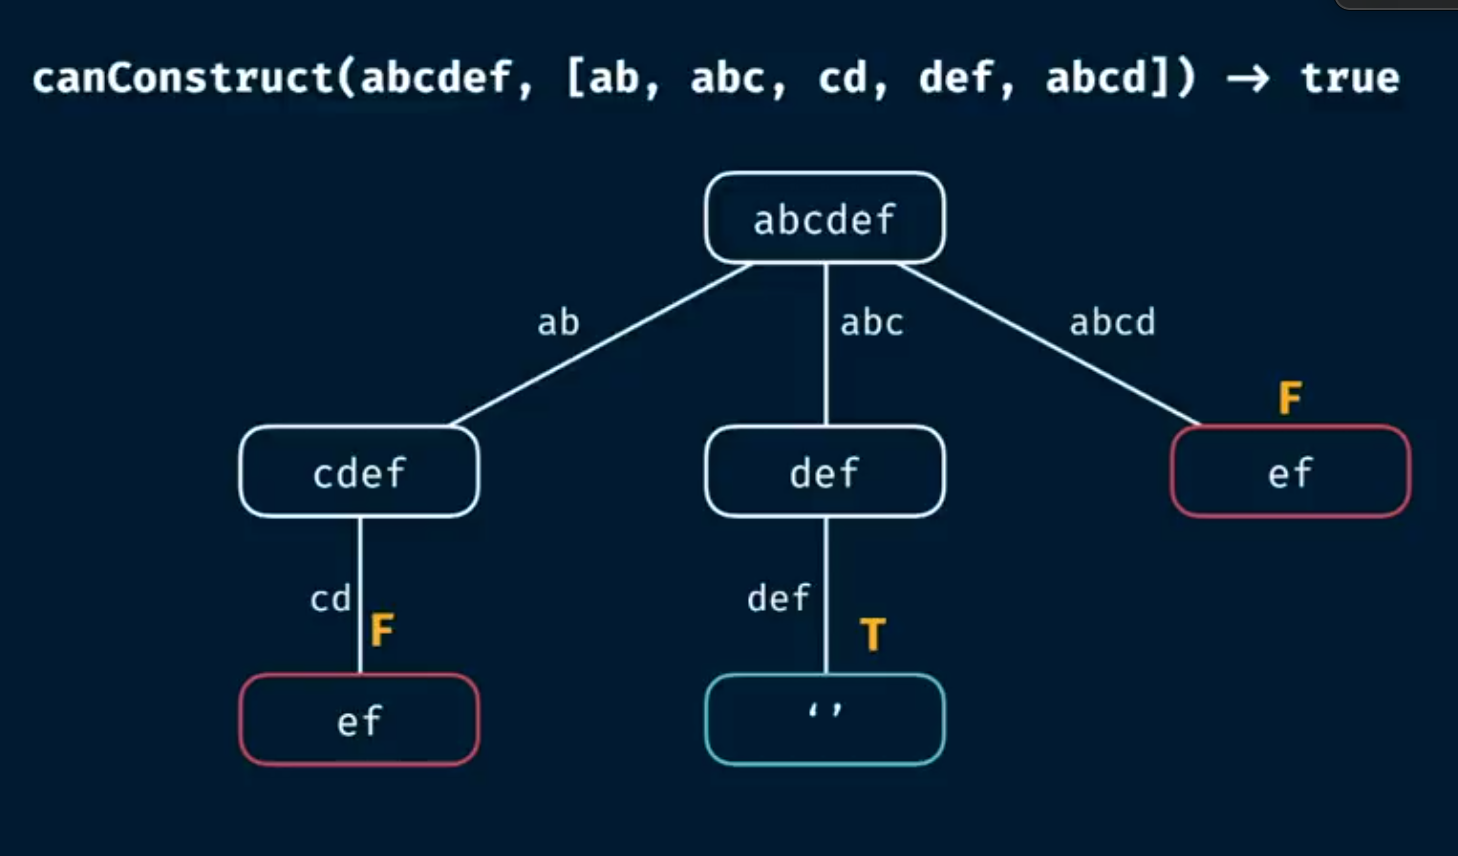

####canConstruct: Brute Force

**Time Complexity**
- $O(n^m * m)$ time
- $O(m^2)$ space

In [ ]:
def canConstruct(target, wordBank):
  if target == "":
    return True
  
  for word in wordBank:
    # if target.index(word) == 0:
    if target.startswith(word[0]):
      suffix = target[len(word):]
      if canConstruct(suffix, wordBank) == True:
        return True
  return False

In [ ]:
start_time = time.time()
print(canConstruct("abcdef", ["ab", "abc", "cd", "def", "abcd"]))
print("--- %s seconds ---" % (time.time() - start_time))

False
--- 0.00016570091247558594 seconds ---


####canConstruct: Memoized

In [ ]:
def canConstruct_memoized(target, wordBank, memo ={}):
  if target == "":
    return True

  if target in memo.keys():
    return memo[target]
  
  for word in wordBank:
    # if target.index(word) == 0:
    if target.startswith(word[0]):
      suffix = target[len(word):]
      value = canConstruct_memoized(suffix, wordBank, memo)
      memo[suffix] = value
      if value == True:
        return True
  return False

In [ ]:
start_time = time.time()
print(canConstruct_memoized("eeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeef", 
                   ["e", 
                    "ee", 
                    "eee", 
                    "eeee", 
                    "eeeee",
                    "eeeeee"]))
print("--- %s seconds ---" % (time.time() - start_time))

True
--- 0.001283407211303711 seconds ---


In [ ]:
"".join(["ab", "abc", "cd", "def", "abcd"])

'ababccddefabcd'

##Hackerrank Test 1: **Selecting Stocks**


An investor has saved some money and wants to invest in the stock market. 

There are a number of stocks to choose from, and they want to buy at most 1 share in any company. The total invested cannot exceed the funds available. 

A friend who is a stock market expert has predicted the values of each stock after 1 year. Determine the maximum profit that can be earned at the end of the year assuming the predictions come true. 

**Example** 
- saving = 250 
- currentValue = [175, 133, 109, 210, 97] 
- futureValue = [200, 125, 128, 228, 133] 

To maximize profits, the investor should buy stocks at indices 2 and 4 for an investment of `109 + 97 = 206`. 

At the end of the year the stocks are sold for `128 + 133 = 261`, so total profit is `261 - 206 = 55`.

In [ ]:
def knapsack(vals, weights, capacity):
    sack = [[0 for i in range(capacity+1)] for j in range(len(weights)+1)]
    
    for i in range(1, len(weights)+ 1):
        for j in range(1, capacity+1):
            if i==0 or j ==0:
                sack[i][j] = 0
            elif (weights[i - 1] <= j):
                sack[i][j] = max(vals[i - 1] + sack[i-1][j - weights[i-1]], sack[i-1][j])
            else:
                sack[i][j] = sack[i - 1][j]
    return sack[len(weights)][capacity]

def selectStock(saving, currentValue, futureValue, index = 0, profit = 0):
    values = [0 for x in range(len(currentValue))]
    
    for i in range(len(currentValue)):
        actualValue = futureValue[i] - currentValue[i]
        if actualValue < 0:
            actualValue = 0
        values[i] = actualValue
    return knapsack(values, currentValue, saving)

##Hackerrank Test 2: **Fountains**

There is a one-dimensional garden of length `N`. In each position of the `N` length garden, a fountain has been installed. 

Given an array `a[]` such that `a[i]` describes the coverage limit of ith fountain. A fountain can cover the range from the position `max(i – a[i], 1)` to `min(i + a[i], N)`. 

In beginning, all the fountains are switched off. The task is to find the minimum number of fountains needed to be activated such that the whole N-length garden can be covered by water.

**Examples**
**Input:** a[ ] = {1, 2, 1}
**Output:** 1
**Explanation:**
- For position 1: a[1] = 1, range = 1 to 2
- For position 2: a[2] = 2, range = 1 to 3
- For position 3: a[3] = 1, range = 2 to 3

Therefore, the fountain at position a[2] covers the whole garden.

Therefore, the required output is 1.


---


**Input:** a[ ] = {2, 1, 1, 2, 1} 
**Output:** 2 

In [ ]:
# Function to find minimum
# number of fountains to be
# activated
 
 
def minCntFoun(a, N):
 
    # dp[i]: Stores the position of
    # rightmost fountain that can
    # be covered by water of leftmost
    # fountain of the i-th fountain
    dp = [0] * N
    for i in range(N):
      dp[i] = -1
 
    # Traverse the array
    for i in range(N):
        idxLeft = max(i - a[i], 0)
        idxRight = min(i + (a[i] + 1), N)
        dp[idxLeft] = max(dp[idxLeft],
                          idxRight)
 
    # Stores count of fountains
    # needed to be activated
    cntfount = 1
 
    idxRight = dp[0]
 
    # Stores index of next fountain
    # that needed to be activated
    idxNext = 0
 
    # Traverse dp[] array
    for i in range(N):
        idxNext = max(idxNext,
                      dp[i])
 
        # If left most fountain
        # cover all its range
        if (i == idxRight):
            cntfount += 1
            idxRight = idxNext
 
    return cntfount
 
 
# Driver code
if __name__ == '__main__':
 
    a = [1, 2, 1]
    N = len(a)
 
    print(minCntFoun(a, N))

## **Profit Targets**

A financial analyst is responsible for a portfolio of profitable stocks represented in an array. Each item in the array represents the yearly profit of a corresponding stock. The analyst gathers all distinct pairs of stocks that reached the target profit. Distinct pairs are pairs that differ in at least one element. Given the array of profits, find the number of distinct pairs of stocks where the sum of each pair's profits is exactly equal to the target profit.


Example

-- stocksProfit =[5,7,9,13,11,6,6,3,3]

-- target =12 profit's target


- There are 4 pairs of stocks that have the sum of their profits equals to the target 12. Note that because there are two instances of 3 in stocksprofit there are two pairs matching (9,3) : stocksprofits indices 2 and 7, and indices 2 and 8 , but only one can be included.

- There are 3 distinct pairs of stocks: (5,7), 3,9), and (6,6) and the return value is 3 .


Function Description

Complete the function stockPairs in the editor below.

stockPairs has the following parameter(s):

int stocksProfit[n]: an array of integers representing the stocks profits target: an integer representing the yearly target profit

Returns:

inc the total number of pairs determined


Constraints

- 1 ≤ n ≤ 5 × 10⁵

- 0 ≤ stockspront(i) ≤ 10⁹

- 0 ≤ target ≤ 5 × 10⁹

In [ ]:
# Online Python compiler (interpreter) to run Python online.
# Write Python 3 code in this online editor and run it.
s = [5, 7, 9, 13, 11, 6, 6, 3, 3]
t = 12

def stockPairs(stocksProfit, target):
    # Write your code here
    n = len(stocksProfit)
    stocksProfit = sorted(stocksProfit)
    print(stocksProfit)
    
    low =0
    high = n-1
    pairs =0
    while (low<high):
        if (stocksProfit[low]+stocksProfit[high]==target):
            pairs +=1
            low += 1
            high -=1
            
            
        elif(stocksProfit[low]+stocksProfit[high]<target):
            low += 1
        else:
            high -= 1
    return pairs
    
print(stockPairs(s, t))


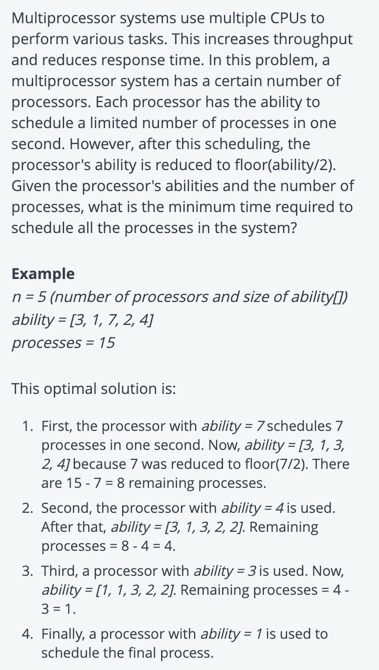




## AWS

### **Find the missing number in the array**

You are given an array of positive numbers from `1` to `n`, such that all numbers from `1` to `n` are present except one number `x`. You have to find `x`. The input array is not sorted. Look at the below array and give it a try before checking the solution.


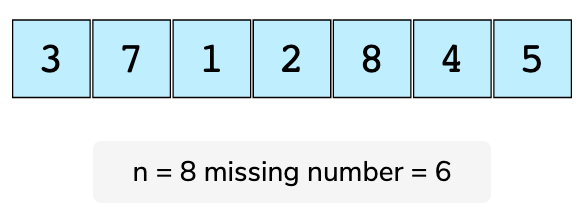

In [ ]:
# First try
def find_missing(input):
  start_time = time.time()
  sum_1 = 0
  sum_2 = 0
  for i in range(len(input)):
    sum_1 = sum_1 + input[i];
  for i in range(1, len(input) + 2):
    sum_2 = sum_2 + i;
  print("Time:", time.time() - start_time)
  return sum_2 - sum_1

In [ ]:
# Optimal - Runtime Complexity: Linear, O(n)O(n)O(n)
def find_missing(input):
  start_time = time.time()
  # calculate sum of all elements 
  # in input list
  sum_of_elements = sum(input)
  
  # There is exactly 1 number missing 
  n = len(input) + 1
  # (n / 2)(first number + last number) = sum
  actual_sum = (n * ( n + 1 ) ) / 2
  print("Time:", time.time() - start_time)
  return actual_sum - sum_of_elements

In [ ]:
find_missing([3,7,1,2,8,6,9,10,12,13,14,4,5])

Time: 3.814697265625e-06


11.0

### **Determine if the sum of two integers is equal to the given value**

Given an array of integers and a value, determine if there are any two integers in the array whose sum is equal to the given value. Return true if the sum exists and return false if it does not. Consider this array and the target sums:

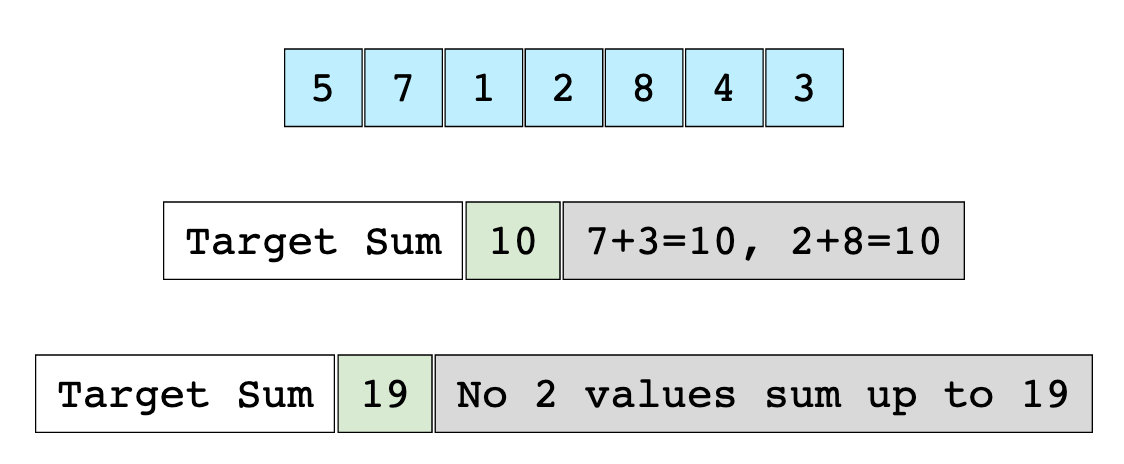

In [ ]:
def find_sum_of_two(A, val):
  start_time = time.time()
  found = False
  for i in range(int(val/2)+1):
    if (i == val-i and A.count(i) < 2):
      found = False
    elif (i in A and val-i in A):
      found = True
      break
  print("Time:", time.time() - start_time)
  return found

In [ ]:
# Optimal
def find_sum_of_two(A, val):
  start_time = time.time()
  found_values = set()
  for a in A:
    if val - a in found_values:
      return True

    found_values.add(a)
  print("Time:", time.time() - start_time)
  return False

In [ ]:
find_sum_of_two([5,7,1,2,8,4,3], 19)

Time: 1.239776611328125e-05


False

### **Merge two sorted linked lists**

Given two sorted linked lists, merge them so that the resulting linked list is also sorted. Consider two sorted linked lists and the merged list below them as an example.

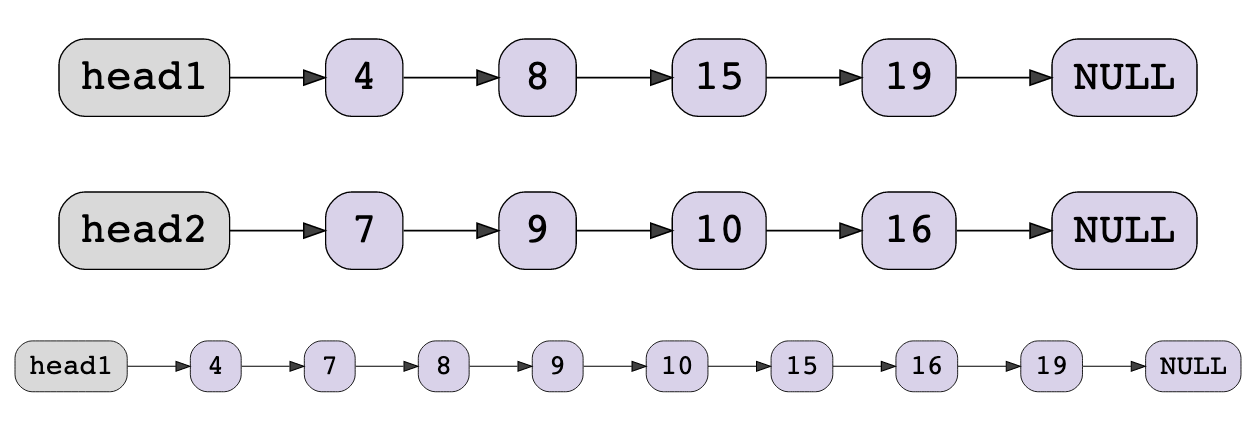

In [ ]:
def merge_sorted(head1, head2):
  head1 = head1 + head2
  head1 = sorted(head1)
  return head1

In [ ]:
merge_sorted([4,8,15,19], [7,9,10,16])

[4, 7, 8, 9, 10, 15, 16, 19]

In [ ]:
# Solution
def merge_sorted(head1, head2):
  # if both lists are empty then merged list is also empty
  # if one of the lists is empty then other is the merged list
  if head1 == None:
    return head2
  elif head2 == None:
    return head1

  mergedHead = None;
  if head1.data <= head2.data:
    mergedHead = head1
    head1 = head1.next
  else:
    mergedHead = head2
    head2 = head2.next

  mergedTail = mergedHead
  
  while head1 != None and head2 != None:
    temp = None
    if head1.data <= head2.data:
      temp = head1
      head1 = head1.next
    else:
      temp = head2
      head2 = head2.next

    mergedTail.next = temp
    mergedTail = temp

  if head1 != None:
    mergedTail.next = head1
  elif head2 != None:
    mergedTail.next = head2

  return mergedHead

## Two Sum

Given an array of integers nums and an integer target, return indices of the two numbers such that they add up to target.

You may assume that each input would have exactly one solution, and you may not use the same element twice.

You can return the answer in any order.

**Example**

Input: nums = `[2,7,11,15]`, target = `9`

Output: [0,1]

Explanation: Because `nums[0]` + `nums[1]` == `9`, we return `[0, 1]`.



In [ ]:
class Solution:    
    def twoSum(self, nums: list, target: int) -> list:
        ind = []
        _hash = {}
        
        for i in range(len(nums)):
            if (i == 0):
                _hash[nums[i]] = i
            else:
                base = target - nums[i]
                if (_hash.get(base) != None):
                    ind.append(i)
                    ind.append(_hash[base])
                    break
                else:
                    _hash[nums[i]] = i
        return ind

In [ ]:
_solution = Solution()
print(_solution.twoSum([2,7,11,15], 9))

[1, 0]


## Merge Sorted Array

You are given two integer arrays nums1 and nums2, sorted in non-decreasing order, and two integers m and n, representing the number of elements in nums1 and nums2 respectively.

Merge nums1 and nums2 into a single array sorted in non-decreasing order.

The final sorted array should not be returned by the function, but instead be stored inside the array nums1. To accommodate this, nums1 has a length of m + n, where the first m elements denote the elements that should be merged, and the last n elements are set to 0 and should be ignored. nums2 has a length of n.

In [ ]:
#  Insertion Sort method
def merge(nums1: list, m: int, nums2: list, n: int) -> None:
    """
    Do not return anything, modify nums1 in-place instead.
    """
    nums3 = nums1[:m]
    # print(nums3)
    i = 0
    j = 0
    k = 0
    while (i < m and j < n):        
        # Check if current element
        # of first array is smaller
        # than current element of
        # second array. If yes,
        # store first array element
        # and increment first array
        # index. Otherwise do same
        # with second array
        if (nums3[i] < nums2[j]):
            # print("block 1:", nums1[i], nums2[j])
            nums1[k] = nums3[i]
            i = 1 + i
            k = 1 + k
        else:
            # print("block 2:", nums1[i], nums2[j])
            nums1[k] = nums2[j]
            j = 1 + j
            k = 1 + k

    # Check which one got to the end first
    if (m == i):
        while j < n:
            nums1[k] = nums2[j]
            j = 1 + j
            k = 1 + k
    else:
        while i < m:
            nums1[k] = nums3[i]
            i = 1 + i
            k = 1 + k
    print(nums1)

In [ ]:
merge([1,2,3,0,0,0], 3, [2,5,6], 3)

[1, 2, 2, 3, 5, 6]


## Insertion Sort

Insertion sort is a simple sorting algorithm that works similar to the way you sort playing cards in your hands. The array is virtually split into a sorted and an unsorted part. Values from the unsorted part are picked and placed at the correct position in the sorted part.

**Algorithm**

To sort an array of size n in ascending order:

1: Iterate from arr[1] to arr[n] over the array. 

2: Compare the current element (key) to its predecessor. 

3: If the key element is smaller than its predecessor, compare it to the elements before. Move the greater elements one position up to make space for the swapped element.

Time Complexity: O(n^2) 

In [24]:
# Python program for implementation of Insertion Sort
 
# Function to do insertion sort
def insertionSort(arr):
 
    # Traverse through 1 to len(arr)
    for i in range(1, len(arr)):
        
        key = arr[i]

        # Move elements of arr[0..i-1], that are
        # greater than key, to one position ahead
        # of their current position
        j = i-1
        while j >= 0 and key < arr[j] :
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key
    return arr

In [25]:
# Driver code to test above
arr = [12, 11, 13, 5, 6]
insertionSort(arr)

[5, 6, 11, 12, 13]

## Parking Lot OOD

In [30]:
import time
import enum 

class TicketStatus (enum.Enum) :
    ACTIVE = 1
    COMPLETE = 2
class VehicleType (enum.Enum) :
    CAR = 1
    BIKE = 2
class SpotType (enum.Enum) :
    FREE = 1
    TAKEN = 2

class ParkingLot :
    def __init__(self, name, address) :
        self.name = name
        self.address = address
        self.level = []
    def addLevel(self, floor):
        self.level.append(floor)
    def processEntry(self, ticket) :
        for eachlevel in self.level :
            if eachlevel.spots[ticket.veh.type][SpotType.FREE] :
                ticket.spot = eachlevel.assignSpot(ticket)
                print('Entry Completed For : ', ticket.veh.num)
                break;
    def processExit(self, ticket) :
        for eachlevel in self.level :
            if ticket.spot in eachlevel.spots[ticket.veh.type][SpotType.TAKEN] :
                eachlevel.unassignSpot(ticket)
                break;
        ticket.outTime  = time.time()
        ticket.spots    = None
        ticket.status   = TicketStatus.COMPLETE
        ticket.payment  = Payment(ticket.inTime, ticket.outTime)
        print('Exit Completed For  : ', ticket.veh.num, ' Pay : ', int(ticket.payment.amount))

class ParkingLevel :
    def __init__(self, name) :
        self.name = name
        self.spots = {VehicleType.CAR : {SpotType.FREE : [], SpotType.TAKEN : []}, 
                        VehicleType.BIKE : {SpotType.FREE : [], SpotType.TAKEN : []} }
    def assignSpot(self, ticket) :
        if self.spots[ticket.veh.type][SpotType.FREE] != [] :
            spot = self.spots[ticket.veh.type][SpotType.FREE].pop()
            ticket.spot = spot
            self.spots[ticket.veh.type][SpotType.TAKEN].append(spot)
            return ticket.spot
        return False
    def unassignSpot(self, ticket) :
        self.spots[ticket.veh.type][SpotType.FREE].append(ticket.spot)
        self.spots[ticket.veh.type][SpotType.TAKEN].remove(ticket.spot)
    def addSpot(self, type, num) :
        for eachnum in range(num) :
            spot = Spot(type)
            self.spots[type][SpotType.FREE].append(spot)            

class Vehicle :
    def __init__(self, num) :
        self.id     = self.generateID()
        self.num    = num
    def generateID(self) :
        yield range(100)

class Car (Vehicle) :
    def __init__(self, num) :
        super().__init__(num)
        self.type   = VehicleType.CAR

class Bike (Vehicle) :
    def __init__(self, num) :
        super().__init__(num)
        self.type   = VehicleType.BIKE

class Spot :
    def __init__(self, type) :
        self.id     = self.generateID()
        self.type   = type
    def generateID(self) :
        yield range(100)

class Payment :
    def __init__(self, inTime, outTime) :
        self.mode   = None
        self.rate   = [30, 20, 10]
        self.amount = self.calAmount(inTime, outTime)
    def getRate(self) :
        return self.rate
    def setRate(self, rate) :
        self.rate = rate
    def calAmount(self, inTime, outTime) :
        amount =  (outTime - inTime) * self.getRate()[0]
        amount += (outTime - inTime - 60 ) * self.getRate()[1] if outTime - inTime - 60 > 0 else 0
        amount += (outTime - inTime - 120 ) * self.getRate()[2] if outTime - inTime - 120 > 0 else 0
        return amount        

class Ticket :
    def __init__(self, veh) :
        self.veh     = veh
        self.status  = TicketStatus.ACTIVE
        self.inTime  = time.time()
        self.outTime = None
        self.payment = None
        self.spot    = None
    def generateID(self) :
        # some ID generation mechanism
        return ID

class DisplayBoard :
    def show(self, P) :
        for eachlevel in P.level :
            print(P.name , '-' , eachlevel.name, '- Available Parking Spots')
            print('Car  : ', len(eachlevel.spots[VehicleType.CAR][SpotType.FREE]))
            print('Bike : ', len(eachlevel.spots[VehicleType.BIKE][SpotType.FREE]))


P = ParkingLot('Google Parking Lot', '123, Fort, Mumbai')
F1 = ParkingLevel('F1')
F1.addSpot(VehicleType.CAR, 3)
F1.addSpot(VehicleType.BIKE, 3)
P.addLevel(F1)

Board = DisplayBoard()
Board.show(P)

T1 = Ticket(Car('MH05 AB 5454'))
P.processEntry(T1)

T2 = Ticket(Bike('MH05 AB 9000'))
P.processEntry(T2)

time.sleep(2)  
P.processExit(T2)

Board = DisplayBoard()
Board.show(P)

Google Parking Lot - F1 - Available Parking Spots
Car  :  3
Bike :  3
Entry Completed For :  MH05 AB 5454
Entry Completed For :  MH05 AB 9000
Exit Completed For  :  MH05 AB 9000  Pay :  60
Google Parking Lot - F1 - Available Parking Spots
Car  :  2
Bike :  3


In [30]:
from typing import ValuesView
# Floors, Ticketing, Spots, Vehicles -> (Cars, Bikes, Trucks)

import enum
from datetime import datetime

class VehicleType (enum.Enum):
  Bike = 1
  Car = 2
  Bus = 3
  Truck = 4

class TicketStatus (enum.Enum):
  Active = 1
  Inactive = 0

class ParkingLot():
  def __init__(self, ticketing_system, name="Colorado"):
    self.name = name
    self.ticketing_system = ticketing_system
  def __str__(self):
    return "Welcome to", self.name, "parking lot"
  def Entry(self, Ticket):
    try:
      if (self.ticketing_system.validate(Ticket["ticket_id"])):
        return "Access granted"
      else:
        return "Access denied"
    except:
      return "Access denied"
  def Exit(self, Ticket):
    try:
      self.ticketing_system.cancel(Ticket)
      return "Do have a nice day"
    except:
      return "Invalid ticket"

class Vehicle():
  def __init__(self, plate_number: str, brand: str, model: str, color: str):
    self.plate_number = plate_number
    self.brand = brand
    self.model = model
    self.color = color

class Bike(Vehicle):
  def __init__(self, plate_number: str, brand: str, model: str, color: str):
    super().__init__(plate_number, brand, model, color)
    self.vehicle_type = VehicleType.Bike

class Car(Vehicle):
  def __init__(self, plate_number: str, brand: str, model: str, color: str):
    super().__init__(plate_number, brand, model, color)
    self.vehicle_type = VehicleType.Car

class Bus(Vehicle):
  def __init__(self, plate_number: str, brand: str, model: str, color: str):
    super().__init__(plate_number, brand, model, color)
    self.vehicle_type = VehicleType.Bus

class Truck(Vehicle):
  def __init__(self, plate_number: str, brand: str, model: str, color: str):
    super().__init__(plate_number, brand, model, color)
    self.vehicle_type = VehicleType.Truck

class Ticketing():
  import time
  def __init__(self, spot):
    self.spot = spot
    self.tickets = {}

  def generate(self, vehicle):
    # Check for space
    # Check entry time
    if (self.spot.free_spot(vehicle.vehicle_type)):
      ticket_id = time.time()
      
      self.tickets[int(ticket_id)] = {
          "ticket_id": int(ticket_id),
          "vehicle": vehicle,
          "time_in": datetime.now,
          "status": TicketStatus.Active,
      }
      self.spot.add(ticket_id,vehicle.vehicle_type)
      return self.tickets[int(ticket_id)]
    else:
      print("There is no more space in the park")
  def validate(self, ticket_id):
    if (self.tickets.get(ticket_id) != None):
      if (self.tickets[ticket_id]["status"] != TicketStatus.Inactive):
        return True
    return False

  def cancel(self, ticket):
    self.tickets[ticket["ticket_id"]]["status"] = TicketStatus.Inactive
    self.spot.remove(ticket)
    

    
  def print_tickets(self):
    return self.tickets

class Spots():
  def __init__(self):
    self.spot_db = { VehicleType.Bike: [None]*3,
                VehicleType.Car: [None]*3,
                VehicleType.Bus: [None]*3,
                VehicleType.Truck: [None]*3
               }
  
  def add(self, ticket_id, vehicle_type):
    for i in range(len(self.spot_db[vehicle_type])):
      if self.spot_db[vehicle_type][i] == None:
        self.spot_db[vehicle_type][i]  = int(ticket_id)
        break
  def remove(self, ticket):
    vehicle = ticket["vehicle"]
    veh_type = vehicle.vehicle_type
    for i in range(len(self.spot_db[veh_type])):
      if (self.spot_db[ticket["vehicle"].vehicle_type][i] == ticket["ticket_id"]):
        self.spot_db[ticket["vehicle"].vehicle_type][i] = None
  def free_spot(self, vehicle_type):
    if None in self.spot_db[vehicle_type]:
      return True
    else:
      return False

In [31]:
spots = Spots()
john_v = Car("H54SJ4", "Toyota", "Camry 2022", "Red")
ken_v = Bus("K544J4", "Toyota", "Hilux 2021", "Gold")

ticketing = Ticketing(spots)
parkinglot = ParkingLot(ticketing)

In [32]:
print(spots)

In [33]:
ken_ticket = ticketing.generate(ken_v)

NameError: ignored

In [34]:
ken_ticket2 = ticketing.generate(ken_v)

NameError: ignored

In [4]:
ticketing.print_tickets()

{}

In [267]:
parkinglot.Entry(ken_ticket)

'Access granted'

In [268]:
parkinglot.Entry(ken_ticket2)

'Access denied'

In [269]:
parkinglot.Exit(ken_ticket)

'Do have a nice day'

In [270]:
ticketing.print_tickets()

{1649862929: {'status': <TicketStatus.Inactive: 0>,
  'ticket_id': 1649862929,
  'time_in': <function datetime.now>,
  'vehicle': <__main__.Bus at 0x7f51e6658850>},
 1649862933: {'status': <TicketStatus.Active: 1>,
  'ticket_id': 1649862933,
  'time_in': <function datetime.now>,
  'vehicle': <__main__.Bus at 0x7f51e6658850>}}

## Linked List Implementation (Python)

In [26]:
# A single node of a singly linked list
class Node:
  # constructor
  def __init__(self, data = None, next=None): 
    self.data = data
    self.next = next

# A Linked List class with a single head node
class LinkedList:
  def __init__(self):  
    self.head = None
  
  # insertion method for the linked list
  def insert(self, data):
    newNode = Node(data)
    if(self.head):
      current = self.head
      while(current.next):
        current = current.next
      current.next = newNode
    else:
      self.head = newNode
  
  # print method for the linked list
  def printLL(self):
    current = self.head
    while(current):
      print(current.data)
      current = current.next

# Singly Linked List with insertion and print methods
LL = LinkedList()
LL.insert(3)
LL.insert(4)
LL.insert(5)
LL.printLL()

3
4
5


## Design data structures and algorithms for in-memory file system

Explain the data structures and algorithms that you would use to design an in-memory file system. Illustrate with an example in the code logic where possible.

**Asked In: Amazon**

A file system, in its most simplistic version, consists of Files and Directories. Each Directory contains a set of Files and Directories. Since Files and Directories share so many characteristics, we’ve implemented them such that they inherit from the same class, Entry.



```
// Entry is superclass for both File and Directory
public abstract class Entry
{
	protected Directory parent;
	protected long created;
	protected long lastUpdated;
	protected long lastAccessed;
	protected String name;

	public Entry(String n, Directory p)
	{
		name = n;
		parent = p;
		created= System.currentTimeMillis();
		lastUpdated = System.currentTimeMillis();
		lastAccessed = System.currentTimeMillis();
	}

	public boolean delete()
	{
		if (parent == null)
			return false;
		return parent.deleteEntry(this);
	}

	public abstract int size();

	/* Getters and setters. */
	public long getcreationTime()
	{
		return created;
	}
	public long getLastUpdatedTime()
	{
		return lastUpdated;
	}
	public long getLastAccessedTime()
	{
		return lastAccessed;
	}
	public void changeName(String n)
	{
		name = n;
	}
	public String getName()
	{
		return name;
	}
}

// A class to represent a File (Inherits
// from Entry)
public class File extends Entry
{
	private String content;
	private int size;

	public File(String n, Directory p, int sz)
	{
		super(n, p);
		size = sz;
	}
	public int size()
	{
		return size;
	}
	public String getContents()
	{
		return content;
	}
	public void setContents(String c)
	{
		content = c;
	}
}

// A class to represent a Directory (Inherits
// from Entry)
public class Directory extends Entry
{
	protected Arraylist<Entry> contents;

	public Directory(String n, Directory p)
	{
		super(n, p);
		contents = new Arraylist<Entry>();
	}
	public int size()
	{
		int size = 0;
		for (Entry e : contents)
			size += e.size();
		
		return size;
	}
	public int numberOfFiles()
	{
		int count = 0;
		for (Entry e : contents)
		{
			if (e instanceof Directory)
			{
				count++; // Directory counts as a file
				Directory d = (Directory) e;
				count += d. numberOfFiles ();
			}
			else if (e instanceof File)			
				count++;			
		}
		return count;
	}

	public boolean deleteEntry(Entry entry)
	{
		return contents.remove(entry);
	}

	public void addEntry(Entry entry)
	{
		contents.add(entry);
	}

	protected ArrayList<Entry> getContents()
	{
		return contents;
	}
}
```



## Implementing Singleton Class Python

In [35]:
class SingletonClass(object):
  def __new__(cls):
    if not hasattr(cls, 'instance'):
      cls.instance = super(SingletonClass, cls).__new__(cls)
    return cls.instance
   
class SingletonChild(SingletonClass):
    pass
   
singleton = SingletonClass() 
child = SingletonChild()
print(child is singleton)
 
singleton.singl_variable = "Singleton Variable"
print(child.singl_variable)

True
Singleton Variable


## Integer to Roman
Roman numerals are represented by seven different symbols: `I`, `V`, `X`, `L`, `C`, `D` and `M`.


Symbol   |    Value
---------|----------
I        |     1
V        |     5
X        |     10
L        |     50
C        |     100
D        |     500
M        |     1000

For example, `2` is written as `II` in Roman numeral, just two one's added together. `12` is written as `XII`, which is simply `X` + `II`. The number `27` is written as `XXVII`, which is `XX` + `V` + `II`.

Roman numerals are usually written largest to smallest from left to right. However, the numeral for four is not `IIII`. Instead, the number four is written as `IV`. Because the one is before the five we subtract it making four. The same principle applies to the number nine, which is written as `IX`. There are six instances where subtraction is used:

- `I` can be placed before `V` (5) and X (10) to make 4 and 9. 
- `X` can be placed before `L` (50) and C (100) to make 40 and 90. 
- `C` can be placed before `D` (500) and M (1000) to make 400 and 900.
Given an integer, convert it to a roman numeral.

In [6]:
def intToRoman(num: int) -> str:
    _dict = {
        1: "I",
        4: "IV",
        5: "V",
        9: "IX",
        10: "X",
        40: "XL",
        50: "L", 
        90: "XC",
        100: "C", 
        400: "CD",
        500: "D",
        900: "CM",
        1000: "M"
            }
    roman_val = ""
    for i in reversed(list(_dict.keys())):
        while num >= i:
            roman_val += _dict[i]
            num -= i
    return roman_val

In [8]:
intToRoman(46)

'XLVI'